# Clustering

Nesse notebook iremos explorar alguns dos modelos de clustering :D

### Tipos de clustering

- **Por partição**
- **Hierárquico**
- **Por densidade**

## Por partição: **K-means**

![](https://media.giphy.com/media/VryvUKuOxNLqM/giphy.gif)

### Exercício 1

Vamos utilizar uma base fictícia contendo dados de visitas de clientes em um site que gostaríamos de segmentar:  
- **Visitas**: quantidade de visitas realizadas durante o mês
- **Tempo**: tempo, em segundos, que os usuários ficaram no site

In [0]:
# imports necessários para a aula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
plt.rcParams['figure.figsize'] = (12, 7)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# importar o dataset
df = pd.read_csv("data/case.csv")

In [98]:
df.head()

,visitas,tempo
0,3,2
1,16,18
2,7,1
3,14,11
4,3,24


In [99]:
df.describe()

,visitas,tempo
count,3000.000000,3000.000000
mean,30.221000,41.165333
std,24.852097,24.983863
min,0.000000,0.000000
25%,9.000000,19.000000
50%,19.000000,42.000000
75%,56.000000,62.000000
max,87.000000,104.000000


**Vamos visualizar a distribuição desses dados?**

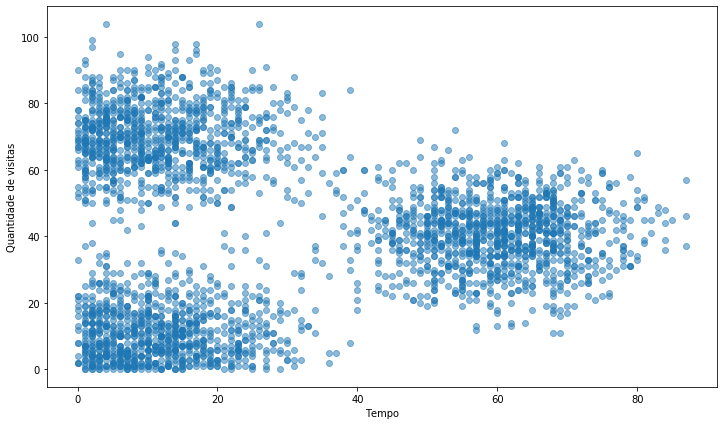

In [100]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

**IMPORTANTE**

Como os agrupamentos são definidos com base em uma medida de distância, primeiro **precisamos normalizar os dados**!

In [0]:
# Importar o StandardScaler e normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

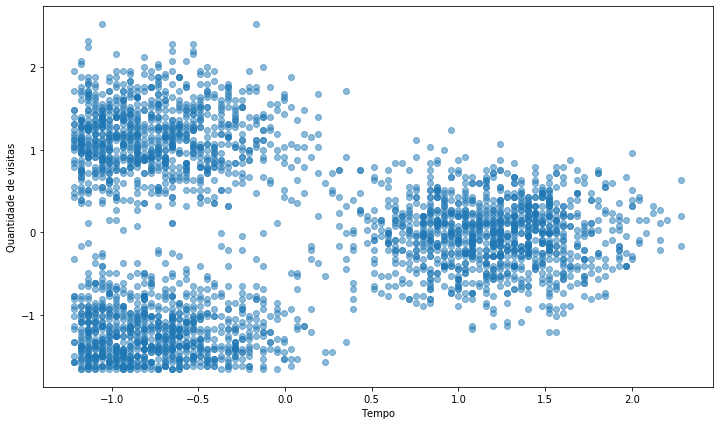

In [102]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

**Voltando ao K-means...**



O Sklearn já conta com uma implementação do [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Podemos importá-la:

In [0]:
# Importar o K-means
from sklearn.cluster import KMeans

In [0]:
# cria uma instância do K-means
kmeans = KMeans(n_clusters=4, random_state=19) 
kmeans.fit(df)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

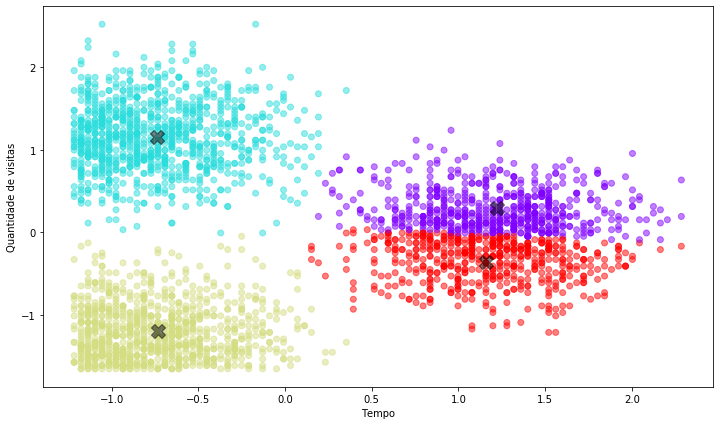

In [105]:
# plota os dados identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

**Acham que 8 clusters fazem sentido nesse caso? Podemos mudar o número de clusters!**

**IMPORTANTE²**

Além de definir o número de clusters, também é **importante escolher uma seed**. Isso porque como os centroides iniciais são escolhidos aleatoriamente, clusters diferentes podem ser gerados pelo K-means dependendo dessa iniciação e do número de clusters.

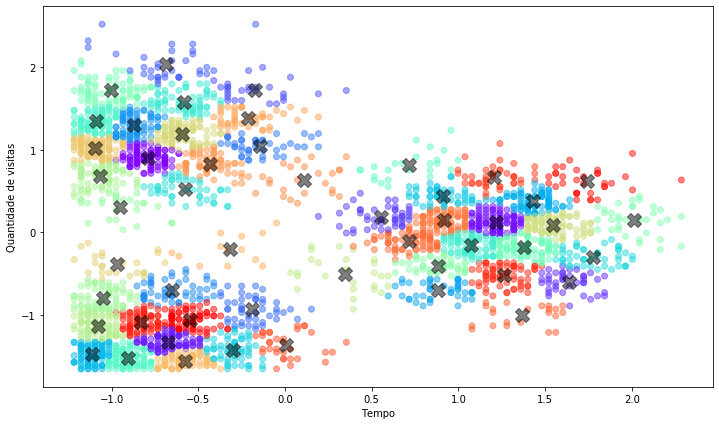

In [106]:
# Sem o seed
kmeans = KMeans(n_clusters=50) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

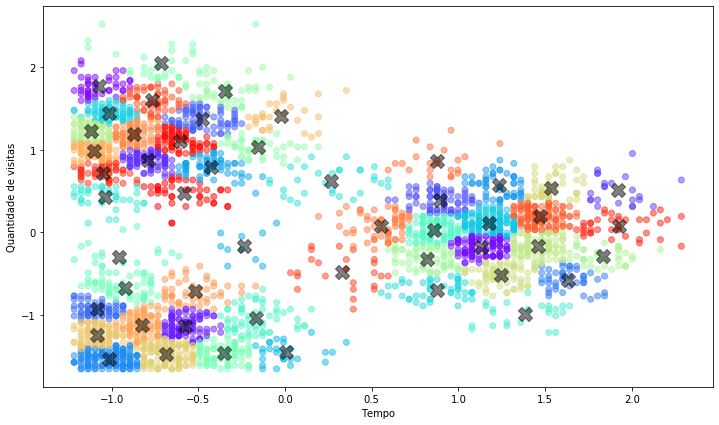

In [107]:
# Com o seed
kmeans = KMeans(n_clusters=50, random_state=8) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Altere o número de clusters e rode o algoritmo de novo. Vamos ver o que acontece :D

Não se esqueça de adicionar uma seed!

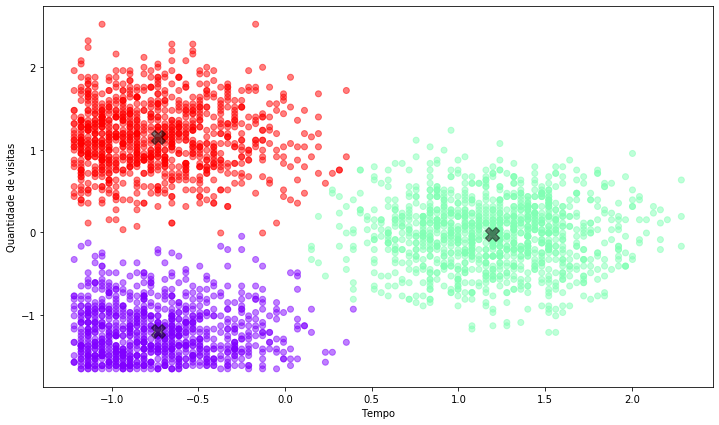

In [108]:
# TODO
kmeans = KMeans(n_clusters=3, random_state=8) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

![](figures/inercia.png)

Para escolhermos o número de clusters, observamos o gráfico do cotovelo com as inércias e escolhemos o ponto no qual a inércia começa a ficar mais plana e formar um "cotovelo":

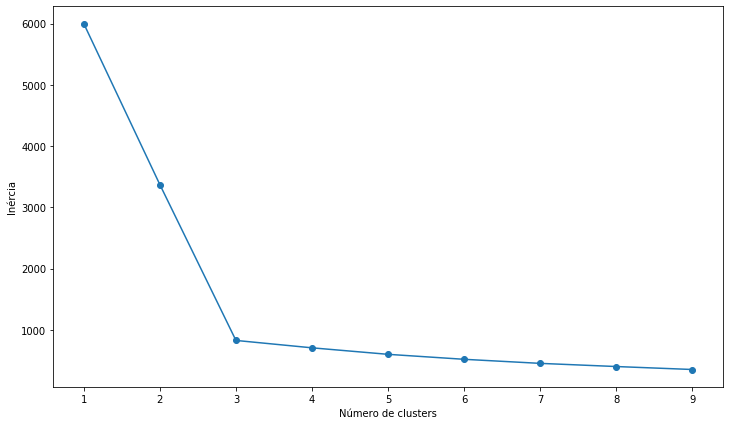

In [109]:
# Quantidade de clusters que serão testados
k = list(range(1, 10))

# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=8)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

### Exercício 2

Agora vamos fazer mais uma segmentação de clientes com o K-Means, dessa vez com mais features. O dataset que iremos utilizar é uma adaptação [deste aqui](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) presente no Kaggle.

Dessa vez, vamos supor que estamos envolvidos em um projeto de um e-commerce que tem como objetivo segmentar e entender seus clientes para realizar campanhas de marketing.

In [0]:
# importar o dataset
segmentation = pd.read_csv("data/customer_segmentation.csv")

In [111]:
segmentation.head()

,id,tem_cartao,idade,renda,score
0,1,Não,19,1500,39
1,2,Não,21,1500,81
2,3,Sim,20,1600,6
3,4,Sim,23,1600,77
4,5,Sim,31,1700,40


In [112]:
segmentation.describe(include='all')

,id,tem_cartao,idade,renda,score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Sim,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,6056.000000,50.200000
std,57.879185,NaN,13.969007,2626.472117,25.823522
min,1.000000,NaN,18.000000,1500.000000,1.000000
25%,50.750000,NaN,28.750000,4150.000000,34.750000
50%,100.500000,NaN,36.000000,6150.000000,50.000000
75%,150.250000,NaN,49.000000,7800.000000,73.000000


Esse conjunto de dados possui 5 campos:

- **id**: código identificador do cliente
- **tem_cartao**: indica se o cliente tem cartão de crédito do e-commerce ou não
- **idade**: idade do cliente
- **renda**: renda mensal do cliente, em reais
- **score**: score indicando o gasto do cliente. Quanto maior, mais o cliente gasta no e-commerce

**Observando os dados acima, quais pré-processamentos vocês acham que serão necessários antes de realizarmos o agrupamento?**

**`1° - Remoção do identificador`**

O conjunto de dados contém o id do cliente que não iremos utilizar para a segmentação. Precisamos remover antes de realizar o agrupamento:

In [0]:
segmentation.drop(columns='id', inplace=True)

**`2° - Lidar com feature categórica`**

Temos mais um ponto para resolver antes do agrupamento: a feature `tem_cartao` é categórica e o **k-means só lida com dados numéricos**.

![](http://giphygifs.s3.amazonaws.com/media/dJtDZzyjLF66I/giphy.gif)

**O que podemos fazer para lidar com variáveis categóricas então?**
- Feature engineering (One-hot enconding, Label Encoder, etc.)
- Utilizar outro algoritmo que permita usar esse tipo de variável

No nosso caso, vamos utilizar o [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html):

In [0]:
# importar o LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [0]:
label_encoder = LabelEncoder()
segmentation['tem_cartao'] = label_encoder.fit_transform(segmentation.tem_cartao.values)

**`3° - Normalizar os dados`**

As escalas das features são diferentes, então precisamos normalizar os dados:

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaled_segmentation = pd.DataFrame(scaler.fit_transform(segmentation),columns = segmentation.columns)

**Agora sim podemos aplicar o K-means \o/**

Primeiro, vamos utilizar a regra do cotovelo para escolher o número de clusters:

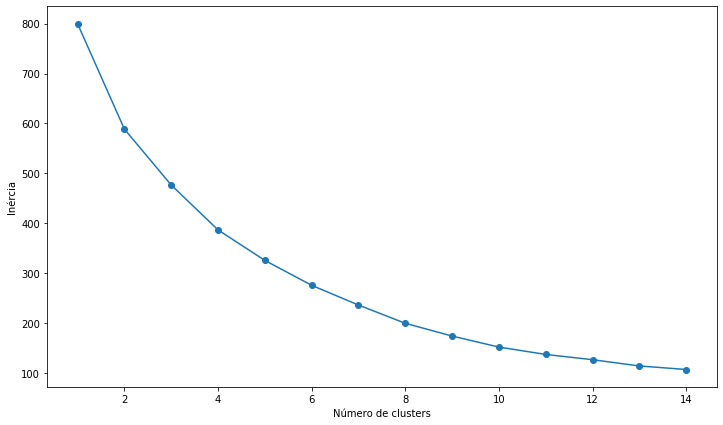

In [118]:
# Quantidade de clusters que serão testados
k = list(range(1, 15))

# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(scaled_segmentation)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Com base no gráfico acima, podemos escolher a quantidade de clusters que serão criados:

In [0]:
model = KMeans(n_clusters=4, random_state=1)
clusters = model.fit_predict(scaled_segmentation)

Após o agrupamento, precisamos reverter a normalização para podermos interpretar os clusters formados!

In [0]:
original_segmentation = pd.DataFrame(scaler.inverse_transform(scaled_segmentation),columns=segmentation.columns)

Como utilizamos 4 features para criação dos clusters, não podemos visualizá-las como no 1° exercício. Podemos utilizar o [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) para tentar interpretar os clusters:

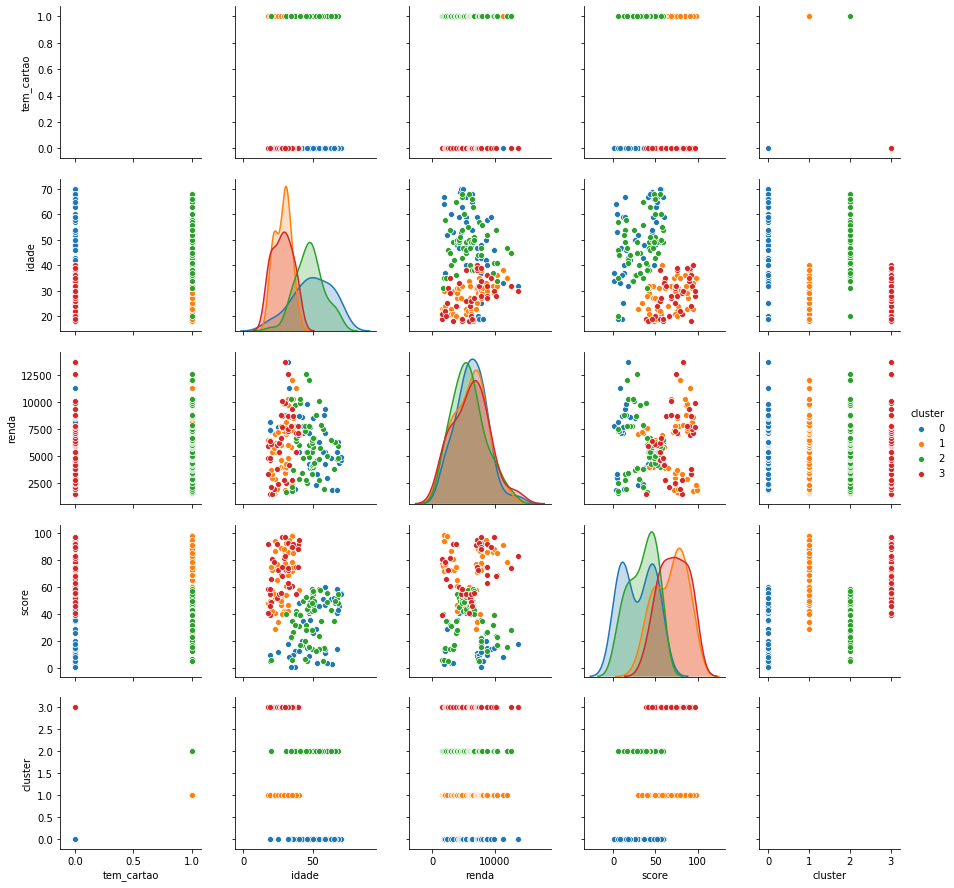

In [121]:
original_segmentation['cluster'] = clusters
sns.pairplot(original_segmentation, hue = 'cluster');

**O que podemos identificar com base nos clusters criados?**

- **Cluster 0** - esse cluster compreende os clientes mais velhos e menos engajados, visto que não apresentam o cartão de crédito e que apresentam score de gastos mais baixos.
- **Cluster 1** - esse cluster compreende os clientes adultos que possuem o cartão de crédito e um score relativamente alto, indicando que esse cluster contempla os clientes mais engajados.
- **Cluster 2** - esse cluster compreende clientes um pouco mais velhos que, apesar de possuírem o cartão, não gastam tanto no site. Pode ser interessante realizar campanhas com promoções e mostrando as vantagens da utilização com o cartão de crédito do e-commerce voltadas para esse público mais velho.
- **Cluster 3** - esse cluster é similar ao Cluster 1, com a diferença de que os clientes nesse cluster não possuem o cartão de crédito do e-commerce. Pode ser interessante realizar campanhas para engajar esses clientes a adquirirem o cartão.

Além disso, para esse agrupamento, a renda mensal não parece diferenciar muito bem os clusters, visto que todos apresentam uma distribuição relativamente similar. 

Talvez com uma quantidade maior de clusters, a renda poderia variar conforme o cluster que o cliente pertencesse! Só temos que tomar cuidado porque quanto maior a quantidade de clusters, menor é a quantidade de exemplos que estarão em cada um deles:

In [122]:
original_segmentation.cluster.value_counts()

2    56
1    56
0    48
3    40
Name: cluster, dtype: int64

Além dessa análise dos clusters considerando a distribuição das features em cada um deles, **também poderíamos utilizar os centroides para caracterizar cada cluster**, visto que eles são os representantes de cada grupo.

### Exemplo - compressão de imagens


Vamos agora ver um exemplo de aplicação do K-Means trabalhando com imagens :D

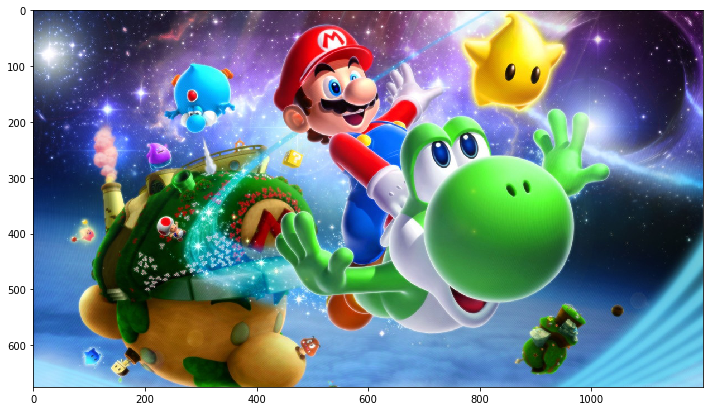

In [123]:
# Importar a imagem
img = plt.imread("data/mario.jpg")
plt.imshow(img)
plt.show()

In [124]:
# dimensão da imagem
img.shape

(675, 1200, 3)

In [125]:
# redimensionar a imagem para termos somente duas dimensões de dados
x, y, z = img.shape
img_2d = img.reshape(x*y, z)
img_2d.shape

(810000, 3)

|   Pixel    | R   | G   | B   |
|---------|-----|-----|-----|
| Pixel 1 | 255 | 0   | 0   | 
| Pixel 2 | 255 | 102 | 102 | 
| Pixel 3 | 0   | 0   | 0   |  

In [0]:
# TODO
# Escolha um número de clusters e use o K-means para realizar os agrupamentos
kmeans_img = KMeans(n_clusters=15, random_state=8)
kmeans_img.fit(img_2d)

cluster_centers = kmeans_img.cluster_centers_
cluster_labels = kmeans_img.labels_

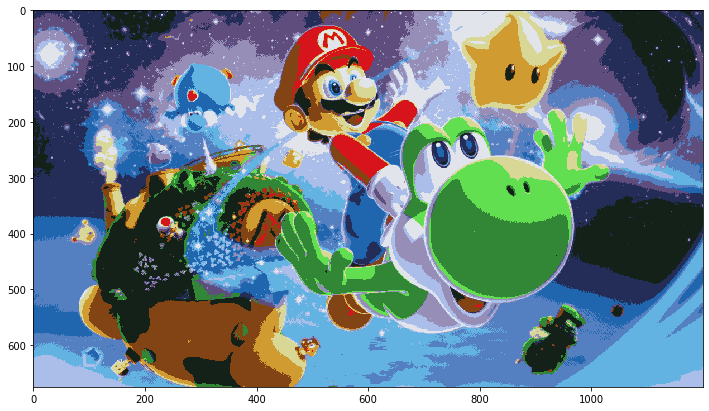

In [127]:
# Plotar a imagem após a compressão
plt.imshow(cluster_centers[cluster_labels].
           reshape(x, y, z).astype(int))
plt.show()

Quanto maior o número de clusters, mais colorida a imagem ficará.

## Hierárquico: **Agrupamento Hierárquico Aglomerativo**

![](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif)

### Exercício 3

Vamos utilizar o mesmo conjunto de dados utilizado no segundo exercício do K-means para realizar um agrupamento hierárquico aglomerativo. Para esse agrupamento, precisaremos importar o dendograma do [Scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

O sklearn também possui um [módulo](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) para realizar um agrupamento hierárquico aglomerativo, mas é complicado visualizar o dendograma com ele, então vamos ficar com o scipy mesmo.

In [0]:
# importar os módulos dendogram e linkage
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
h_cluster = linkage(scaled_segmentation, method='complete', metric='euclidean')

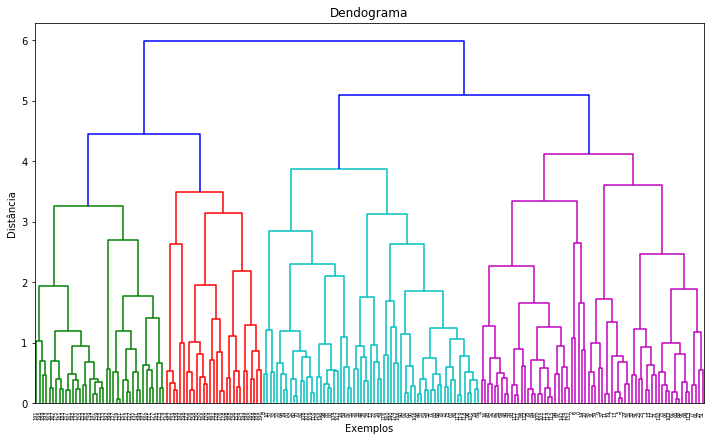

In [130]:
plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
dendrogram(h_cluster)
plt.show()

**Vamos testar outras abordagens de agrupamentos e métricas de distância?**

![](https://media.giphy.com/media/12zV7u6Bh0vHpu/giphy.gif)

**E como podemos escolher o número de clusters?**

Podemos visualizar o dendograma e observar onde há a maior distância entre os grupos formados.

## Por densidade: **DBSCAN**

![](https://media.giphy.com/media/lCL2GQewp7fkk/giphy.gif)

### Exercício 4

Vamos utilizar novamente o conjunto do primeiro exercício com o DBSCAN, que vamos importar do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

In [0]:
# TODO
# Importar o DBSCAN
from sklearn.cluster import DBSCAN

In [0]:
# TODO
# Escolha um epsilon e um minPts
dbscan = DBSCAN(eps = .1, min_samples = 8)
# salvar os clusters atribuídos para cada exemplo
clusters = dbscan.fit_predict(df)

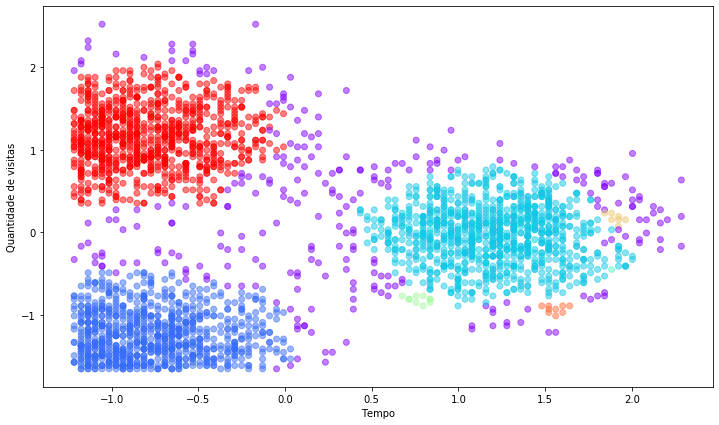

In [133]:
# plota os clusters encontrados
plt.scatter(df.visitas, df.tempo, c=clusters, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

No gráfico acima, conseguimos notar que todos os exemplos em roxo foram considerados outliers pelo DBSCAN, ou seja, não foram colocados em nenhum cluster.
Para esses casos, o DBSCAN retornará o valor -1 para indicar que o exemplo é um outlier.